In [1]:
import pandas as pd
import os
import numpy as np

cur_dir = os.getcwd()
path = os.path.join(cur_dir,'dataset','train.csv')
path

df_train = pd.read_csv( os.path.join(cur_dir,'dataset','train.csv'), sep=',' )
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_users = pd.read_csv( os.path.join(cur_dir,'dataset','users.csv'), sep='::' )
df_test = pd.read_csv( os.path.join(cur_dir,'dataset','test.csv'), sep=',' )
df_SampleSubmisson = pd.read_csv( os.path.join(cur_dir,'dataset','SampleSubmisson.csv'), sep=',' )

mean = df_train.Rating.mean()
std = df_train.Rating.std()
df_train['Rating_normalized'] = (df_train['Rating'] - mean)/std

all_user = np.concatenate([df_train.UserID,df_test.UserID],axis=0)
all_movie = np.concatenate([df_train.MovieID,df_test.MovieID],axis=0)
print(all_user.shape)
print(all_movie.shape)
all_user = np.unique(all_user)
all_movie = np.unique(all_movie)
print(all_user.shape)
print(all_movie.shape)


df_all_movie = pd.DataFrame({'movie_id':all_movie})
df_all_movie['movie_index'] = df_all_movie.index

df_all_user = pd.DataFrame({'user_id':all_user})
df_all_user['user_index'] = df_all_user.index


movie_id_to_index = df_all_movie.set_index('movie_id').to_dict()
movie_id_to_index = movie_id_to_index['movie_index']
user_id_to_index = df_all_user.set_index('user_id').to_dict()
user_id_to_index = user_id_to_index['user_index']

df_train['user_index'] =  df_train.apply(lambda row: user_id_to_index[row.UserID] ,axis=1)
df_train['movie_index'] =  df_train.apply(lambda row: movie_id_to_index[row.MovieID] ,axis=1)

df_train



/media/disk3/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/media/disk3/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


(1000209,)
(1000209,)
(6040,)
(3706,)


,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [2]:
df_train

,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [3]:

user_train = df_train.user_index
movie_train = df_train.movie_index
rating_train = df_train.Rating


In [4]:
from keras.layers import Input, Dense, Embedding, Flatten, dot, add, concatenate
from keras.models import Model
from keras.utils import get_custom_objects
import keras.backend as K
from sklearn.utils import shuffle
import matplotlib.pylab as plt

Using TensorFlow backend.


In [5]:
n_users= df_all_user.shape[0]
n_movies= df_all_movie.shape[0]
latent_dim=20
n_movies

3706

In [6]:
# build model---------------------------------------------------------
user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

user_vecter = Embedding(n_users, latent_dim, embeddings_initializer="random_normal")(user_input)
user_vecter = Flatten()(user_vecter)
movie_vecter = Embedding(n_movies, latent_dim, embeddings_initializer="random_normal")(movie_input)
movie_vecter = Flatten()(movie_vecter)
rating_predict = dot([user_vecter,movie_vecter],axes=1)

model_dot = Model([user_input,movie_input],rating_predict)

# compile model---------------------------------------------------------
def rmse(y_true, y_pred):
    y_pred = K.clip(y_pred, 1.0, 5.0)
    return K.sqrt(K.mean(K.pow(y_true - y_pred, 2)))
get_custom_objects().update({"rmse": rmse})

model_dot.compile(loss="mse", optimizer="adam", metrics=[rmse])

model_dot.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 20)        120800      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 20)        74120       input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 

In [7]:
batch_size=1000
epochs = 10
user_train2, movie_train2, rating_train2 = shuffle(user_train, movie_train, rating_train)

history_dot = model_dot.fit([user_train2, movie_train2],
                    rating_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    shuffle=True)

Train on 809885 samples, validate on 89988 samples
Epoch 1/10
809885/809885 [==============================] - 10s 13us/step - loss: 11.6075 - rmse: 2.7024 - val_loss: 3.8357 - val_rmse: 1.9207
Epoch 2/10
809885/809885 [==============================] - 4s 5us/step - loss: 1.7163 - rmse: 1.2782 - val_loss: 1.0707 - val_rmse: 1.0312
Epoch 3/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.9444 - rmse: 0.9695 - val_loss: 0.8901 - val_rmse: 0.9417
Epoch 4/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.8552 - rmse: 0.9236 - val_loss: 0.8517 - val_rmse: 0.9215
Epoch 5/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.8294 - rmse: 0.9097 - val_loss: 0.8365 - val_rmse: 0.9135
Epoch 6/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.8138 - rmse: 0.9012 - val_loss: 0.8251 - val_rmse: 0.9072
Epoch 7/10
809885/809885 [==============================] - 4s 4us/step - loss: 0.7993 - rmse: 0.8933 - va

# tsne

In [8]:
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_movies['Genres_first'] = df_movies.apply(lambda row: row['Genres'].split('|')[0] ,axis=1)
df_movies



/media/disk3/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movieID,Title,Genres,Genres_first
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Comedy
5,6,Heat (1995),Action|Crime|Thriller,Action
6,7,Sabrina (1995),Comedy|Romance,Comedy
7,8,Tom and Huck (1995),Adventure|Children's,Adventure
8,9,Sudden Death (1995),Action,Action
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action


In [9]:
genre_list = list(df_movies['Genres_first'].value_counts().index)
# genre_list.index('Comedy')
genre_list

['Drama',
 'Comedy',
 'Action',
 'Horror',
 'Adventure',
 'Crime',
 'Documentary',
 'Thriller',
 'Animation',
 "Children's",
 'Romance',
 'Sci-Fi',
 'Mystery',
 'Western',
 'Musical',
 'Film-Noir',
 'War',
 'Fantasy']

In [10]:
df_movies['Genres_label'] = df_movies.apply(lambda row: genre_list.index( row['Genres_first'] ) ,axis=1)
df_movies = df_movies.rename(columns={'movieID': 'movie_id'})
df_movies



,movie_id,Title,Genres,Genres_first,Genres_label
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,8
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,4
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,1
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,1
4,5,Father of the Bride Part II (1995),Comedy,Comedy,1
5,6,Heat (1995),Action|Crime|Thriller,Action,2
6,7,Sabrina (1995),Comedy|Romance,Comedy,1
7,8,Tom and Huck (1995),Adventure|Children's,Adventure,4
8,9,Sudden Death (1995),Action,Action,2
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action,2


In [11]:
df_all_movie2 = pd.merge(df_all_movie, df_movies, how='left', on=['movie_id'])
df_all_movie2 

,movie_id,movie_index,Title,Genres,Genres_first,Genres_label
0,1,0,Toy Story (1995),Animation|Children's|Comedy,Animation,8
1,2,1,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,4
2,3,2,Grumpier Old Men (1995),Comedy|Romance,Comedy,1
3,4,3,Waiting to Exhale (1995),Comedy|Drama,Comedy,1
4,5,4,Father of the Bride Part II (1995),Comedy,Comedy,1
5,6,5,Heat (1995),Action|Crime|Thriller,Action,2
6,7,6,Sabrina (1995),Comedy|Romance,Comedy,1
7,8,7,Tom and Huck (1995),Adventure|Children's,Adventure,4
8,9,8,Sudden Death (1995),Action,Action,2
9,10,9,GoldenEye (1995),Action|Adventure|Thriller,Action,2


In [12]:
df_all_movie2['Genres_label'].values

array([8, 4, 1, ..., 0, 0, 0])

# embedding: (1,) => (1,3706) => (1,20)

In [13]:
movie_embedding = np.array(model_dot.layers[3].get_weights())
print(movie_embedding.shape)
movie_embedding = movie_embedding.squeeze()
print(movie_embedding.shape)

(1, 3706, 20)
(3706, 20)


In [14]:
dim_list = ['dim_%s'%(i) for i in range(movie_embedding.shape[1])]
dim_list

['dim_0',
 'dim_1',
 'dim_2',
 'dim_3',
 'dim_4',
 'dim_5',
 'dim_6',
 'dim_7',
 'dim_8',
 'dim_9',
 'dim_10',
 'dim_11',
 'dim_12',
 'dim_13',
 'dim_14',
 'dim_15',
 'dim_16',
 'dim_17',
 'dim_18',
 'dim_19']

In [15]:
df_movie_embedding = pd.DataFrame(movie_embedding,columns=dim_list)
df_movie_embedding



,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,0.450192,-0.504865,-0.103090,0.295776,0.694886,0.683683,0.799660,-0.608277,-0.278285,-0.629017,-0.786531,0.226294,0.560573,0.623784,0.562768,-0.628631,0.769257,-0.792783,0.551889,-0.565705
1,0.431615,-0.430726,-0.485762,0.538172,0.517412,0.419768,0.497676,-0.358389,0.179805,-0.543139,-0.375438,0.397162,0.431065,0.566069,0.550010,-0.481101,0.472556,-0.484918,0.516970,-0.303871
2,0.317850,-0.448496,-0.535766,0.332578,0.575107,0.373787,0.370851,-0.408281,0.011083,-0.544150,-0.511081,0.334272,0.366277,0.448045,0.398794,-0.496342,0.515180,-0.425936,0.437260,-0.317221
3,0.395578,-0.381133,-0.384618,0.367124,0.391107,0.473604,0.444906,-0.317624,-0.420407,-0.446297,-0.427546,0.212730,0.389871,0.384869,0.434095,-0.437192,0.386772,-0.435794,0.361262,-0.258964
4,0.444645,-0.519909,-0.567909,0.561458,0.469048,0.423425,0.390619,-0.364101,0.048386,-0.502834,-0.276389,0.381401,0.329155,0.480263,0.704516,-0.321758,0.389525,-0.530665,0.563386,-0.261982
5,0.343112,-0.491629,-0.448566,0.189758,0.552157,0.567247,0.662462,-0.478695,-0.287652,-0.697642,-0.479116,0.473958,0.622194,0.576148,0.583949,-0.636421,0.496775,-0.719966,0.515461,-0.503421
6,0.581146,-0.376053,-0.568156,0.861884,0.469467,0.556724,0.464397,-0.526142,-0.263898,-0.376431,-0.547315,0.481513,0.453515,0.279254,0.641569,-0.430027,0.526016,-0.548286,0.402119,-0.388665
7,0.608363,-0.382927,-0.543961,0.621140,0.418828,0.355294,0.423428,-0.384343,-0.342733,-0.382497,-0.329934,0.527829,0.439235,0.395210,0.440856,-0.521651,0.423029,-0.492748,0.465898,-0.296074
8,0.365636,-0.440262,-0.381234,0.368180,0.490767,0.308940,0.418510,-0.376102,0.417231,-0.341623,-0.397077,0.470083,0.387724,0.404884,0.356644,-0.490715,0.323976,-0.296695,0.434089,-0.197031
9,0.232903,-0.658306,-0.507676,0.542389,0.658873,0.574116,0.575149,-0.414085,0.394669,-0.411869,-0.476521,0.411411,0.542331,0.575435,0.427732,-0.525152,0.589261,-0.560148,0.487171,-0.290907


In [16]:
df_movie_embedding['Genres_label'] = df_all_movie2['Genres_label'].values
df_movie_embedding

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,Genres_label
0,0.450192,-0.504865,-0.103090,0.295776,0.694886,0.683683,0.799660,-0.608277,-0.278285,-0.629017,...,0.226294,0.560573,0.623784,0.562768,-0.628631,0.769257,-0.792783,0.551889,-0.565705,8
1,0.431615,-0.430726,-0.485762,0.538172,0.517412,0.419768,0.497676,-0.358389,0.179805,-0.543139,...,0.397162,0.431065,0.566069,0.550010,-0.481101,0.472556,-0.484918,0.516970,-0.303871,4
2,0.317850,-0.448496,-0.535766,0.332578,0.575107,0.373787,0.370851,-0.408281,0.011083,-0.544150,...,0.334272,0.366277,0.448045,0.398794,-0.496342,0.515180,-0.425936,0.437260,-0.317221,1
3,0.395578,-0.381133,-0.384618,0.367124,0.391107,0.473604,0.444906,-0.317624,-0.420407,-0.446297,...,0.212730,0.389871,0.384869,0.434095,-0.437192,0.386772,-0.435794,0.361262,-0.258964,1
4,0.444645,-0.519909,-0.567909,0.561458,0.469048,0.423425,0.390619,-0.364101,0.048386,-0.502834,...,0.381401,0.329155,0.480263,0.704516,-0.321758,0.389525,-0.530665,0.563386,-0.261982,1
5,0.343112,-0.491629,-0.448566,0.189758,0.552157,0.567247,0.662462,-0.478695,-0.287652,-0.697642,...,0.473958,0.622194,0.576148,0.583949,-0.636421,0.496775,-0.719966,0.515461,-0.503421,2
6,0.581146,-0.376053,-0.568156,0.861884,0.469467,0.556724,0.464397,-0.526142,-0.263898,-0.376431,...,0.481513,0.453515,0.279254,0.641569,-0.430027,0.526016,-0.548286,0.402119,-0.388665,1
7,0.608363,-0.382927,-0.543961,0.621140,0.418828,0.355294,0.423428,-0.384343,-0.342733,-0.382497,...,0.527829,0.439235,0.395210,0.440856,-0.521651,0.423029,-0.492748,0.465898,-0.296074,4
8,0.365636,-0.440262,-0.381234,0.368180,0.490767,0.308940,0.418510,-0.376102,0.417231,-0.341623,...,0.470083,0.387724,0.404884,0.356644,-0.490715,0.323976,-0.296695,0.434089,-0.197031,2
9,0.232903,-0.658306,-0.507676,0.542389,0.658873,0.574116,0.575149,-0.414085,0.394669,-0.411869,...,0.411411,0.542331,0.575435,0.427732,-0.525152,0.589261,-0.560148,0.487171,-0.290907,2


In [17]:
arr_tsne = df_movie_embedding[dim_list].values
arr_tsne.shape

(3706, 20)

In [18]:
import time

from sklearn.manifold import TSNE


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(  arr_tsne )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3706 samples in 0.008s...
[t-SNE] Computed neighbors for 3706 samples in 0.677s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3706
[t-SNE] Computed conditional probabilities for sample 2000 / 3706
[t-SNE] Computed conditional probabilities for sample 3000 / 3706
[t-SNE] Computed conditional probabilities for sample 3706 / 3706
[t-SNE] Mean sigma: 0.152416
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.525558
[t-SNE] KL divergence after 300 iterations: 2.104884


In [19]:
tsne_results.shape


(3706, 2)

In [20]:
df_movie_embedding['x-tsne'] = tsne_results[:,0]
df_movie_embedding['y-tsne'] = tsne_results[:,1]
df_movie_embedding

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,Genres_label,x-tsne,y-tsne
0,0.450192,-0.504865,-0.103090,0.295776,0.694886,0.683683,0.799660,-0.608277,-0.278285,-0.629017,...,0.623784,0.562768,-0.628631,0.769257,-0.792783,0.551889,-0.565705,8,-2.670578,8.310487
1,0.431615,-0.430726,-0.485762,0.538172,0.517412,0.419768,0.497676,-0.358389,0.179805,-0.543139,...,0.566069,0.550010,-0.481101,0.472556,-0.484918,0.516970,-0.303871,4,-6.114361,0.766823
2,0.317850,-0.448496,-0.535766,0.332578,0.575107,0.373787,0.370851,-0.408281,0.011083,-0.544150,...,0.448045,0.398794,-0.496342,0.515180,-0.425936,0.437260,-0.317221,1,-4.547357,-2.055654
3,0.395578,-0.381133,-0.384618,0.367124,0.391107,0.473604,0.444906,-0.317624,-0.420407,-0.446297,...,0.384869,0.434095,-0.437192,0.386772,-0.435794,0.361262,-0.258964,1,2.337034,-6.502461
4,0.444645,-0.519909,-0.567909,0.561458,0.469048,0.423425,0.390619,-0.364101,0.048386,-0.502834,...,0.480263,0.704516,-0.321758,0.389525,-0.530665,0.563386,-0.261982,1,-5.924535,-0.581561
5,0.343112,-0.491629,-0.448566,0.189758,0.552157,0.567247,0.662462,-0.478695,-0.287652,-0.697642,...,0.576148,0.583949,-0.636421,0.496775,-0.719966,0.515461,-0.503421,2,-2.635305,7.018069
6,0.581146,-0.376053,-0.568156,0.861884,0.469467,0.556724,0.464397,-0.526142,-0.263898,-0.376431,...,0.279254,0.641569,-0.430027,0.526016,-0.548286,0.402119,-0.388665,1,-3.061066,-0.205574
7,0.608363,-0.382927,-0.543961,0.621140,0.418828,0.355294,0.423428,-0.384343,-0.342733,-0.382497,...,0.395210,0.440856,-0.521651,0.423029,-0.492748,0.465898,-0.296074,4,-0.455937,-2.264743
8,0.365636,-0.440262,-0.381234,0.368180,0.490767,0.308940,0.418510,-0.376102,0.417231,-0.341623,...,0.404884,0.356644,-0.490715,0.323976,-0.296695,0.434089,-0.197031,2,-10.144265,-1.350403
9,0.232903,-0.658306,-0.507676,0.542389,0.658873,0.574116,0.575149,-0.414085,0.394669,-0.411869,...,0.575435,0.427732,-0.525152,0.589261,-0.560148,0.487171,-0.290907,2,-8.440537,2.815309


In [21]:
plt.cm.get_cmap("tab20", 18)

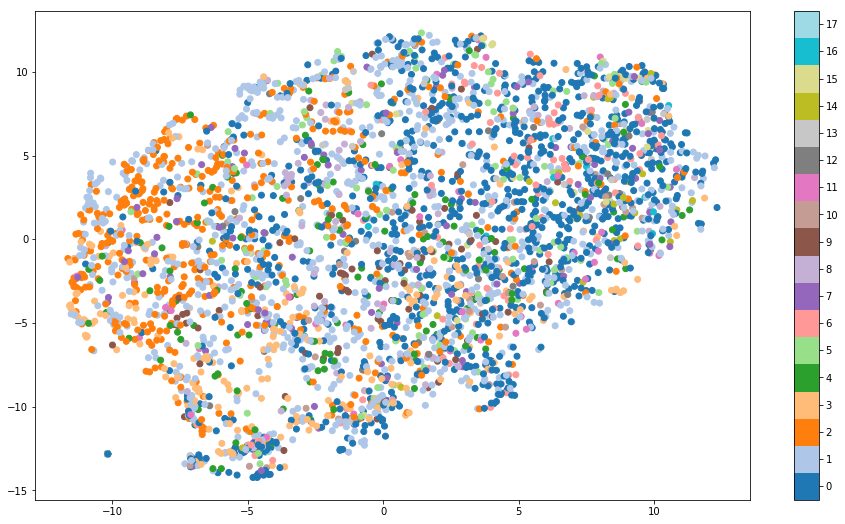

In [22]:
plt.figure(figsize=(16,9))
cm = plt.cm.get_cmap("tab20", 18)

x = df_movie_embedding['x-tsne'].values
y = df_movie_embedding['y-tsne'].values
color = df_movie_embedding['Genres_label'].values


sc = plt.scatter(x, y, c=color, cmap=cm)
plt.colorbar(ticks=range(18))
plt.clim(-0.5, 17.5)
plt.show()

In [23]:
df_Genres = pd.DataFrame(genre_list)
df_Genres

,0
0,Drama
1,Comedy
2,Action
3,Horror
4,Adventure
5,Crime
6,Documentary
7,Thriller
8,Animation
9,Children's
